In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
import os

In [2]:
folder_dir='./dataset/'
test_df=pd.read_csv(folder_dir+os.listdir(folder_dir)[0])
train_df=pd.read_csv(folder_dir+os.listdir(folder_dir)[1])

In [3]:
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [29]:
X=train_df.iloc[:,-2].values
Y=train_df.iloc[:,-1].values

In [5]:
train_df[train_df.isnull().values==True]

,x,y
213,3530.157369,NaN


In [6]:
from sklearn.impute import SimpleImputer
sp=SimpleImputer(missing_values=np.nan,strategy='mean')
Y=Y.reshape(-1,1)
Y=sp.fit_transform(Y)
Y.shape

(700, 1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_X=sc.fit_transform(X.reshape(-1,1))

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_X,Y)

LinearRegression()

In [9]:
X_test=test_df.iloc[:,-2].values
Y_test=test_df.iloc[:,-1].values

In [10]:
X_test=sp.transform(X_test.reshape(-1,1))

In [11]:
y_pred=lr.predict(X_test)

In [12]:
y_pred.shape

(300, 1)

In [13]:
Y_test=Y_test.reshape(-1,1)

In [15]:
model1=lr.score(Y_test,y_pred)
model1

0.9883886222259362

# Dense Model

In [24]:
model_2=tf.keras.Sequential(
[
    tf.keras.layers.Dense(100,activation='linear'),
    tf.keras.layers.Dense(100,activation='linear'),
    tf.keras.layers.Dense(1,activation='linear'),
])

model_2.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

history=model_2.fit(scaled_X,Y,epochs=500)

Epoch 1/500
22/22 [==============================] - 0s 6ms/step - loss: 49.5204 - mae: 49.5204
Epoch 2/500
 1/22 [>.............................] - ETA: 0s - loss: 45.3063 - mae: 45.3063

2022-11-23 19:31:52.115592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 5ms/step - loss: 48.2944 - mae: 48.2944
Epoch 3/500
22/22 [==============================] - 0s 5ms/step - loss: 45.9736 - mae: 45.9736
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 40.3102 - mae: 40.3102
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 29.7829 - mae: 29.7829
Epoch 6/500
22/22 [==============================] - 0s 5ms/step - loss: 24.1748 - mae: 24.1748
Epoch 7/500
22/22 [==============================] - 0s 5ms/step - loss: 22.8236 - mae: 22.8236
Epoch 8/500
22/22 [==============================] - 0s 5ms/step - loss: 21.7125 - mae: 21.7125
Epoch 9/500
22/22 [==============================] - 0s 5ms/step - loss: 20.3875 - mae: 20.3875
Epoch 10/500
22/22 [==============================] - 0s 5ms/step - loss: 18.5751 - mae: 18.5751
Epoch 11/500
22/22 [==============================] - 0s 5ms/step - loss: 16.2491 - mae: 16.2491
Epoch 12/500
22/22 [==============================

22/22 [==============================] - 0s 5ms/step - loss: 7.9967 - mae: 7.9967
Epoch 89/500
22/22 [==============================] - 0s 5ms/step - loss: 7.8203 - mae: 7.8203
Epoch 90/500
22/22 [==============================] - 0s 5ms/step - loss: 7.7784 - mae: 7.7784
Epoch 91/500
22/22 [==============================] - 0s 4ms/step - loss: 8.0947 - mae: 8.0947
Epoch 92/500
22/22 [==============================] - 0s 4ms/step - loss: 7.6766 - mae: 7.6766
Epoch 93/500
22/22 [==============================] - 0s 5ms/step - loss: 7.7236 - mae: 7.7236
Epoch 94/500
22/22 [==============================] - 0s 5ms/step - loss: 7.7707 - mae: 7.7707
Epoch 95/500
22/22 [==============================] - 0s 5ms/step - loss: 7.5862 - mae: 7.5862
Epoch 96/500
22/22 [==============================] - 0s 5ms/step - loss: 7.7042 - mae: 7.7042
Epoch 97/500
22/22 [==============================] - 0s 5ms/step - loss: 7.9970 - mae: 7.9970
Epoch 98/500
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 5ms/step - loss: 8.0386 - mae: 8.0386
Epoch 174/500
22/22 [==============================] - 0s 5ms/step - loss: 7.3119 - mae: 7.3119
Epoch 175/500
22/22 [==============================] - 0s 5ms/step - loss: 8.2549 - mae: 8.2549
Epoch 176/500
22/22 [==============================] - 0s 4ms/step - loss: 7.6261 - mae: 7.6261
Epoch 177/500
22/22 [==============================] - 0s 4ms/step - loss: 7.8154 - mae: 7.8154
Epoch 178/500
22/22 [==============================] - 0s 4ms/step - loss: 7.6952 - mae: 7.6952
Epoch 179/500
22/22 [==============================] - 0s 4ms/step - loss: 7.7637 - mae: 7.7637
Epoch 180/500
22/22 [==============================] - 0s 5ms/step - loss: 7.6979 - mae: 7.6979
Epoch 181/500
22/22 [==============================] - 0s 4ms/step - loss: 7.6947 - mae: 7.6947
Epoch 182/500
22/22 [==============================] - 0s 4ms/step - loss: 7.7734 - mae: 7.7734
Epoch 183/500
22/22 [==============================] -

22/22 [==============================] - 0s 4ms/step - loss: 7.6934 - mae: 7.6934
Epoch 259/500
22/22 [==============================] - 0s 4ms/step - loss: 7.5688 - mae: 7.5688
Epoch 260/500
22/22 [==============================] - 0s 4ms/step - loss: 7.5161 - mae: 7.5161
Epoch 261/500
22/22 [==============================] - 0s 4ms/step - loss: 8.2036 - mae: 8.2036
Epoch 262/500
22/22 [==============================] - 0s 4ms/step - loss: 7.7931 - mae: 7.7931
Epoch 263/500
22/22 [==============================] - 0s 4ms/step - loss: 7.8614 - mae: 7.8614
Epoch 264/500
22/22 [==============================] - 0s 4ms/step - loss: 7.5727 - mae: 7.5727
Epoch 265/500
22/22 [==============================] - 0s 4ms/step - loss: 7.4968 - mae: 7.4968
Epoch 266/500
22/22 [==============================] - 0s 4ms/step - loss: 7.8267 - mae: 7.8267
Epoch 267/500
22/22 [==============================] - 0s 4ms/step - loss: 7.7541 - mae: 7.7541
Epoch 268/500
22/22 [==============================] -

22/22 [==============================] - 0s 5ms/step - loss: 7.5510 - mae: 7.5510
Epoch 344/500
22/22 [==============================] - 0s 5ms/step - loss: 7.6316 - mae: 7.6316
Epoch 345/500
22/22 [==============================] - 0s 5ms/step - loss: 7.4783 - mae: 7.4783
Epoch 346/500
22/22 [==============================] - 0s 6ms/step - loss: 7.5883 - mae: 7.5883
Epoch 347/500
22/22 [==============================] - 0s 5ms/step - loss: 7.6558 - mae: 7.6558
Epoch 348/500
22/22 [==============================] - 0s 5ms/step - loss: 7.7734 - mae: 7.7734
Epoch 349/500
22/22 [==============================] - 0s 5ms/step - loss: 7.5651 - mae: 7.5651
Epoch 350/500
22/22 [==============================] - 0s 6ms/step - loss: 7.6093 - mae: 7.6093
Epoch 351/500
22/22 [==============================] - 0s 7ms/step - loss: 7.7076 - mae: 7.7076
Epoch 352/500
22/22 [==============================] - 0s 5ms/step - loss: 7.7968 - mae: 7.7968
Epoch 353/500
22/22 [==============================] -

22/22 [==============================] - 0s 5ms/step - loss: 7.7440 - mae: 7.7440
Epoch 429/500
22/22 [==============================] - 0s 5ms/step - loss: 7.7117 - mae: 7.7117
Epoch 430/500
22/22 [==============================] - 0s 5ms/step - loss: 7.4819 - mae: 7.4819
Epoch 431/500
22/22 [==============================] - 0s 5ms/step - loss: 7.3383 - mae: 7.3383
Epoch 432/500
22/22 [==============================] - 0s 5ms/step - loss: 7.8889 - mae: 7.8889
Epoch 433/500
22/22 [==============================] - 0s 5ms/step - loss: 7.8557 - mae: 7.8557
Epoch 434/500
22/22 [==============================] - 0s 5ms/step - loss: 7.5772 - mae: 7.5772
Epoch 435/500
22/22 [==============================] - 0s 5ms/step - loss: 7.5960 - mae: 7.5960
Epoch 436/500
22/22 [==============================] - 0s 5ms/step - loss: 7.6026 - mae: 7.6026
Epoch 437/500
22/22 [==============================] - 0s 5ms/step - loss: 7.5191 - mae: 7.5191
Epoch 438/500
22/22 [==============================] -

In [25]:
model_2.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 5ms/step - loss: 6778.1167 - mae: 6778.1167


2022-11-23 19:33:38.971850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[6778.11669921875, 6778.11669921875]

In [26]:
y_pred2=model_2.predict(Y_test)

10/10 [==============================] - 0s 2ms/step


2022-11-23 19:33:41.131459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


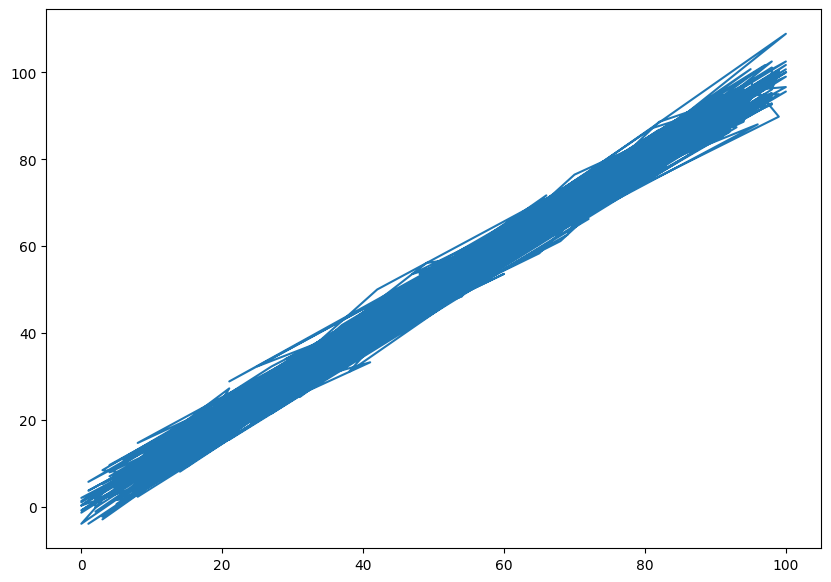

In [30]:
plt.figure(figsize=(10,7))
plt.plot(X,Y)